In [2]:
import pandas as pd
import numpy as np


In [25]:
df = pd.read_csv(r'../data\captone_data.csv')

In [ ]:
df[df['user'] == 2]

,user,item,rating
5402,2,LB0105ENv1,3.0
5602,2,ST0101EN,2.0
6827,2,PY0101EN,3.0
7172,2,ML0120ENv2,3.0
11109,2,DA0101EN,3.0
...,...,...,...
196742,2,DJ0101EN,3.0
200325,2,RP0103EN,3.0
208467,2,ML0122EN,2.0
209385,2,LB0103ENv1,3.0


In [25]:
# Tính số lần xuất hiện (frequency) của mỗi item
item_counts = df['item'].value_counts()
item_counts

item
PY0101EN      14936
DS0101EN      14477
BD0101EN      13291
BD0111EN      10599
DA0101EN       8303
              ...  
DX0106EN          1
ST0201EN          1
ST0301EN          1
DX0108EN          1
GPXX0QR3EN        1
Name: count, Length: 126, dtype: int64

In [ ]:
# Tính số lượng đánh giá cho mỗi item từ tất cả người dùng
item_total_counts = self.df.groupby('item')['rating'].count().reset_index()
item_total_counts.columns = ['item', 'total_count']

# Tính rating của user hiện tại cho mỗi item
user_ratings = self.df[self.df['user'] == user][['item', 'rating']]

# Gộp lại để có cả điểm rating từ user đó và số lượt đánh giá tổng thể
item_stats = pd.merge(user_ratings, item_total_counts, on='item')

# Sắp xếp: ưu tiên điểm rating cao nhất trước, rồi đến item được nhiều người đánh giá
item_stats_sorted = item_stats.sort_values(by=['rating', 'total_count'], ascending=False)

# Lấy item đứng đầu
top_item = item_stats_sorted.iloc[0]['item']


In [ ]:
df = pd.read_csv('data\captone_data.csv')
recommender_engine = Recommender(df)

rid = Ridge_iiCB(df, recommender_engine.item_vectors)
print(rid.predict('LB0101ENv1', 2))

In [3]:
df[(df['user'] == 2) & (df['item'] == 'LB0101ENv1')] 

,user,item,rating
67573,2,LB0101ENv1,3.0


In [244]:
df['user'].to_numpy()

array([1889878, 1342067, 1990814, ..., 1003832,  922065, 1596120],
      shape=(233306,))

In [184]:
love_item = df[df['user'] == 2][['rating', 'item']].sort_values(by='rating', ascending=False).head(1)['item']

In [20]:
top_n=10

item_stats = df.groupby('item').agg(
    count=('rating', 'count'),
    avg_rating=('rating', 'mean')
)
popular_items = item_stats.sort_values(by=['avg_rating', 'count'], ascending=[False, False]).head(top_n)

popular_items

,count,avg_rating
item,,
DA0101EN,8303,3.0
CO0101EN,4480,3.0
BD0141EN,3044,3.0
SC0101EN,2721,3.0
CC0201EN,2321,3.0
BD0145EN,1015,3.0
BD0223EN,818,3.0
CC0150EN,560,3.0
SW0101EN,322,3.0


In [22]:
user_item_matrix = df.pivot_table(index='user', columns='item', values='rating').fillna(0)
user_item_matrix[user_item_matrix['DA0101EN'] == 3]

item,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
2191,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3450,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100030,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import re

def split_code(item):
    # Các trường hợp đặc biệt cần xử lý thủ công
    exceptions = {
        'RAVSCTEST1': 'RAVSC TEST 1',
        'BENTEST4': 'BEN TEST 4',
        'GPXX0QR3EN': 'GPXX 0 QR3 EN',
        'GPXX0T0FEN': 'GPXX 0 T0F EN'
    }
    if item in exceptions:
        return exceptions[item]

    # Tách EN và vX nếu có
    item = re.sub(r'(EN)(v\d+)?$', r' \1 \2', item)

    # Tách prefix chữ đầu khỏi phần còn lại
    item = re.sub(r'^([A-Z]+)([^A-Z].*)', r'\1 \2', item)

    # 👉 Bổ sung: Tách cụm số 4 chữ số thành 2 cụm 2 chữ số
    item = re.sub(r'\b(\d{2})(\d{2})\b', r'\1 \2', item)

    # Tách phần còn lại thành các khối logic
    tokens = re.findall(r'[A-Z]+|\d+|[A-Z]+\d+|\d+[A-Z]+|EN|v\d+', item)

    return ' '.join(filter(None, tokens))


In [23]:
import matplotlib.pyplot as plt

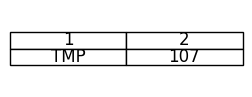

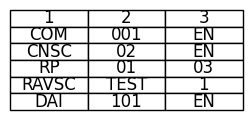

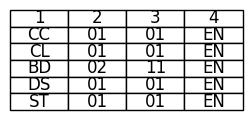

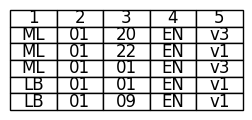

In [33]:
for poc in [2, 3, 4, 5]:
    items = df['item'].unique().tolist()
    n = poc
    columns = [str(i + 1) for i in range(n)]
    rs = []
    for i, item in enumerate(items):
        processed_item = split_code(item)
        component = processed_item.split(' ')
        if len(component) == n:
            rs.append(component)
            
    df_rs = pd.DataFrame(rs, columns=columns).head(5)
    fig, ax = plt.subplots(figsize=(3, 1))  # chỉnh kích thước hình
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df_rs.values,
                    colLabels=df_rs.columns,
                    loc='center',
                    cellLoc='center')

    # 🎨 Tuỳ chỉnh font, màu nếu muốn
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    plt.savefig(f"my_table_{poc}.png", bbox_inches='tight')
    

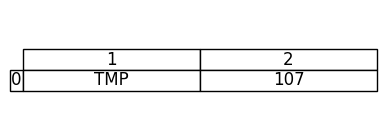

In [ ]:

import matplotlib.pyplot as plt

# 📋 Vẽ bảng bằng matplotlib



In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(rs)
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
print(X.toarray().shape)

['001' '002' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '101' '104'
 '105' '107' '11' '12' '13' '15' '20' '21' '22' '23' '31' '32' '33' '35'
 '37' '41' '43' '45' '50' '51' '53' '71' 'ai' 'bc' 'bd' 'ben' 'cb' 'cc'
 'cl' 'cnsc' 'co' 'com' 'cp' 'da' 'dai' 'db' 'de' 'dj' 'dp' 'ds' 'dv' 'dw'
 'dx' 'ee' 'en' 'gpxx' 'hcc' 'it' 'lb' 'ml' 'os' 'pa' 'phpm' 'py' 'qr3'
 'ravsc' 'rp' 'sc' 'secm' 'st' 'sw' 't0f' 'ta' 'test' 'tmp' 'v1' 'v2' 'v3'
 'wa']
83
(126, 83)


In [249]:
df['user'].index.to_numpy()

array([     0,      1,      2, ..., 233303, 233304, 233305],
      shape=(233306,))

In [237]:
from sklearn.metrics.pairwise import cosine_similarity
simi_matrix = cosine_similarity(X)
pd.DataFrame(simi_matrix)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1.000000,0.256711,0.119522,0.042567,0.337055,0.286996,0.174279,0.164180,0.140947,0.161396,...,0.139240,0.157791,0.140707,0.152909,0.298045,0.127930,0.123338,0.109593,0.138469,0.034436
1,0.256711,1.000000,0.094793,0.033760,0.267320,0.227618,0.138222,0.130212,0.111785,0.128004,...,0.110432,0.125145,0.111595,0.121273,0.236381,0.101462,0.097820,0.086919,0.109820,0.027312
2,0.119522,0.094793,1.000000,0.026993,0.124461,0.105976,0.070879,0.066772,0.057323,0.065640,...,0.056629,0.064174,0.057226,0.062188,0.110056,0.052029,0.050161,0.034748,0.056315,0.021837
3,0.042567,0.033760,0.026993,1.000000,0.044326,0.037743,0.039359,0.037079,0.271537,0.301310,...,0.031446,0.035636,0.031777,0.034533,0.039196,0.028892,0.027855,0.000000,0.031272,0.027511
4,0.337055,0.267320,0.124461,0.044326,1.000000,0.298857,0.757780,0.713868,0.146771,0.168066,...,0.144994,0.164312,0.146522,0.159228,0.310362,0.133217,0.128435,0.619344,0.144191,0.035859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.127930,0.101462,0.052029,0.028892,0.133217,0.113432,0.075866,0.071469,0.061356,0.070258,...,0.060613,0.068688,0.061251,0.066563,0.117799,1.000000,0.053690,0.037193,0.451033,0.023374
122,0.123338,0.097820,0.050161,0.027855,0.128435,0.109360,0.073142,0.068904,0.059153,0.067736,...,0.058437,0.066222,0.059053,0.064174,0.113570,0.053690,1.000000,0.035858,0.058113,0.022534
123,0.109593,0.086919,0.034748,0.000000,0.619344,0.097173,0.499284,0.470351,0.040977,0.046923,...,0.552926,0.045874,0.040908,0.044455,0.100914,0.037193,0.035858,1.000000,0.040257,0.000000
124,0.138469,0.109820,0.056315,0.031272,0.144191,0.122776,0.082115,0.077357,0.066410,0.076045,...,0.065606,0.074346,0.066297,0.072046,0.127503,0.451033,0.058113,0.040257,1.000000,0.025299


In [239]:
df1 = pd.DataFrame(simi_matrix, index=items, columns=items)
df1.to_csv('../data\similarity_matrix\item-item.csv')

In [212]:
love_item = df[df['user'] == 2][['rating', 'item']].sort_values(by='rating', ascending=False)['item'].iloc[0]
love_item

'LB0105ENv1'

In [234]:
dic = df1[love_item].sort_values(ascending=False)[1:6].to_dict()
dic

{'LB0101ENv1': 0.831213889318374,
 'LB0103ENv1': 0.7442907434093149,
 'LB0107ENv1': 0.6778661336128362,
 'LB0109ENv1': 0.6650473115223553,
 'CB0105ENv1': 0.638720494970461}

In [235]:
list(dic.keys())

['LB0101ENv1', 'LB0103ENv1', 'LB0107ENv1', 'LB0109ENv1', 'CB0105ENv1']